#Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load the Cleaned Data for Further Analysis/Modeling

In [2]:
# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_healthcare_dataset.csv')

#Exploratory Data Analysis (EDA):

You can now conduct exploratory data analysis (EDA) on the cleaned data to understand patterns, distributions, relationships between variables, etc.

Age                                           0
Billing Amount                                0
Room Number                                   0
age_billing amount_interaction                0
age_room number_billing amount_interaction    0
Gender_Male                                   0
Blood Type_A-                                 0
Blood Type_AB+                                0
Blood Type_AB-                                0
Blood Type_B+                                 0
Blood Type_B-                                 0
Blood Type_O+                                 0
Blood Type_O-                                 0
Medical Condition_Asthma                      0
Medical Condition_Cancer                      0
Medical Condition_Diabetes                    0
Medical Condition_Hypertension                0
Medical Condition_Obesity                     0
Insurance Provider_Blue Cross                 0
Insurance Provider_Cigna                      0
Insurance Provider_Medicare             

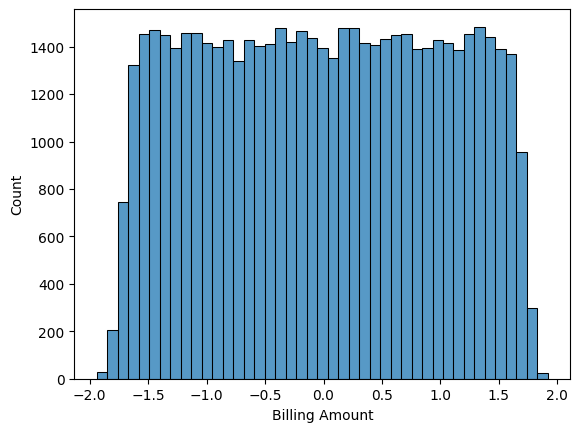

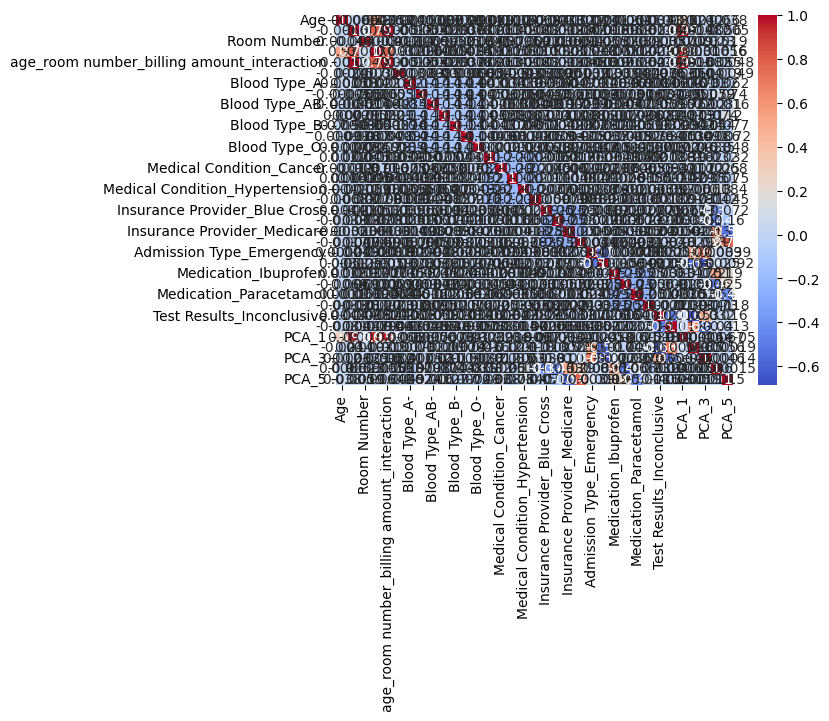

In [3]:
# Check for null values and basic statistics
print(cleaned_data.isnull().sum())
print(cleaned_data.describe())

# Example: Visualize the distribution of 'Billing Amount'
sns.histplot(cleaned_data['Billing Amount'])
plt.show()

# Example: Correlation heatmap for numeric features
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


#Train Machine Learning Models

a. Feature Selection

In [4]:
# Example: Select features for a regression model
X = cleaned_data[['Age', 'Room Number', 'age_billing amount_interaction', 'Billing Amount']]  # Your selected features
y = cleaned_data['Billing Amount']  # Target variable


b. Split Data into Training and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c. Train the Model

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 5.875003329445745e-31
R2 Score: 1.0


#Save the Model

In [7]:
# import joblib

# # Save the trained model
# joblib.dump(model, 'trained_model.pkl')

# # Load the model back when needed
# loaded_model = joblib.load('trained_model.pkl')


#Statistical Analysis: Correlations

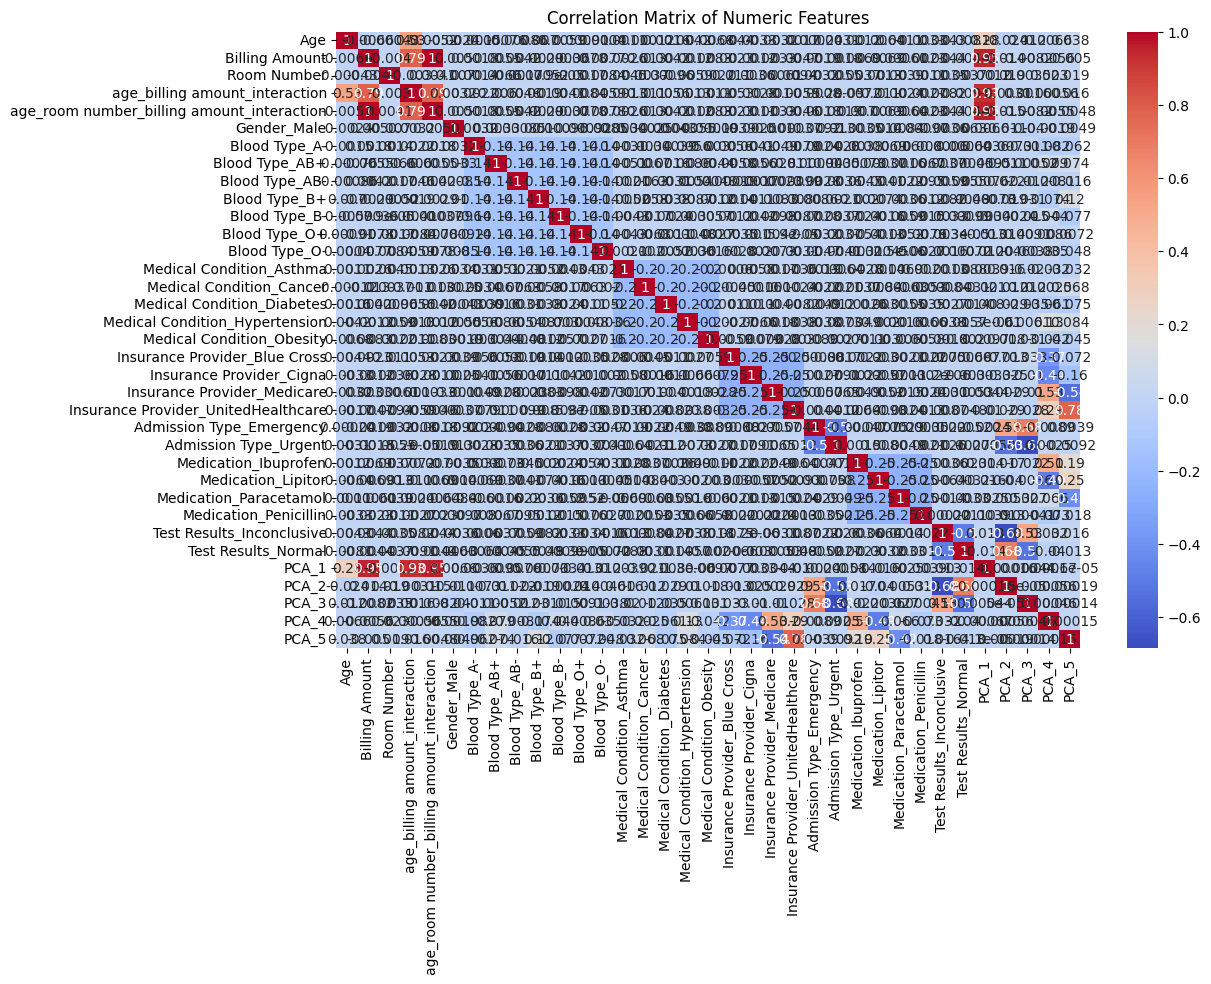

In [8]:
# Calculate and plot correlation matrix
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#Visual Analysis: Data Distributions

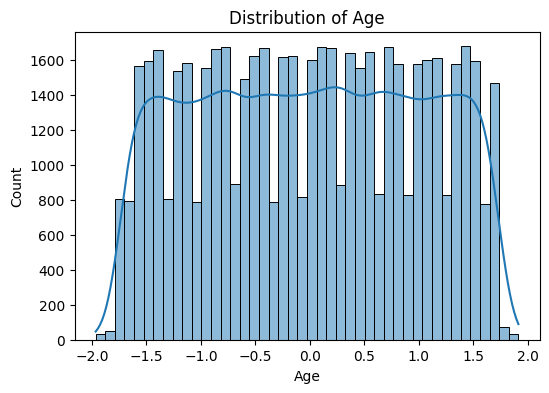

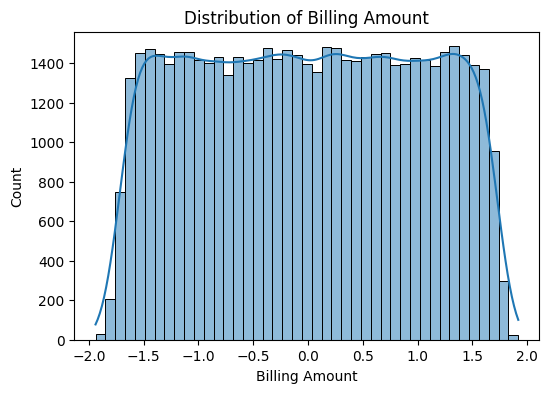

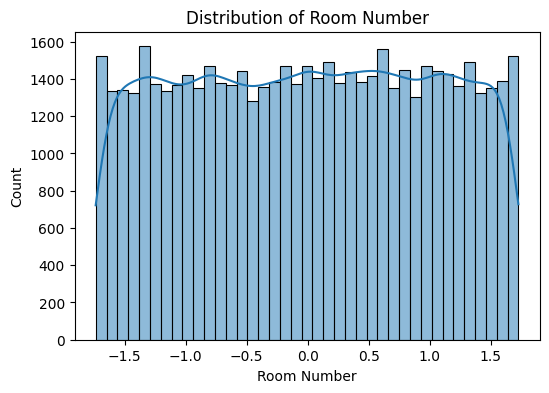

In [9]:
# Plot distributions for a few example columns
for col in ['Age', 'Billing Amount', 'Room Number']:
    if col in cleaned_data.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(cleaned_data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

#Feature Relationship Analysis

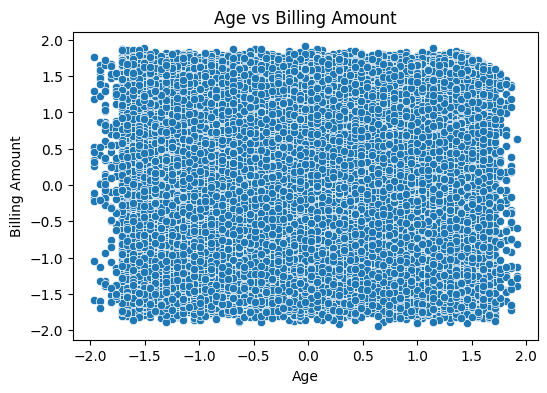

In [11]:
# Scatter plot for Age vs Billing Amount (example relationship)
if 'Age' in cleaned_data.columns and 'Billing Amount' in cleaned_data.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=cleaned_data, x='Age', y='Billing Amount')
    plt.title("Age vs Billing Amount")
    plt.show()

#Optional: Basic Regression Analysis if there's a target variable (example with 'Billing Amount')

In [14]:
if 'Billing Amount' in cleaned_data.columns:
    # Set 'Billing Amount' as the target and use other numeric columns as features
    X = cleaned_data.select_dtypes(include=[np.number]).drop(columns=['Billing Amount'])
    y = cleaned_data['Billing Amount']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Model Evaluation:\n R² Score: {r2:.2f}\n RMSE: {rmse:.2f}")
else:
    print("No target variable 'Billing Amount' found for regression analysis.")

Model Evaluation:
 R² Score: 1.00
 RMSE: 0.00
